# Finance Data Project


In this data project we will focus on exploratory data analysis of stock prices.We'll focus on bank stocks and see how they progressed throughout the financial crisis all the way to early 2016.

In [1]:
from pandas_datareader import data,wb
import pandas as pd
import numpy as np 
import datetime
%matplotlib inline

D:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)
#BAC
BAC = data.DataReader("BAC", 'yahoo', start, end)
# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [3]:
tickers = ['BAC','C','GS','JPM','MS','WFC']
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [4]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],keys=tickers,axis=1)

In [5]:
bank_stocks.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  35.054218   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  34.681938   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  34.726604   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  34.674480   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  34.696808   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  37.140598  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  37.166069  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  37.267979  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  37.306194  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  37.701099  31.825001  31.555000  31.674999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.324865  
2006-01-04  31.530001  10870000.0  20.089125  
2006-01-05  31.495001  10158000.0  20.066822  
2006-01-06  31.680000   8403800.0  20.184694  
2006-01-09  31.674999   5619600.0  20.181515  

[5 rows x 36 columns]

In [6]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [7]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.054218  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.681938  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.726604  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.674480  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.696808  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  37.140598  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  37.166069  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  37.267979  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.306194  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  37.701099  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.324865  
2006-01-04   31.799999  31.530001  10870000.0  20.089125  
2006-01-05   31.500000  31.495001  10158000.0  20.066822  
2006-01-06   31.580000  31.680000   8403800.0  20.184694  
2006-01-09   31.674999  31.674999   5619600.0  20.181515  

[5 rows x 36 columns]

In [8]:
bank_stocks.xs(key='Close',level='Stock Info',axis=1).max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [9]:
returns = pd.DataFrame()

for tick in tickers:
    returns[tick + ' Returns']= bank_stocks[tick]['Close'].pct_change()

In [10]:
returns.head()

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


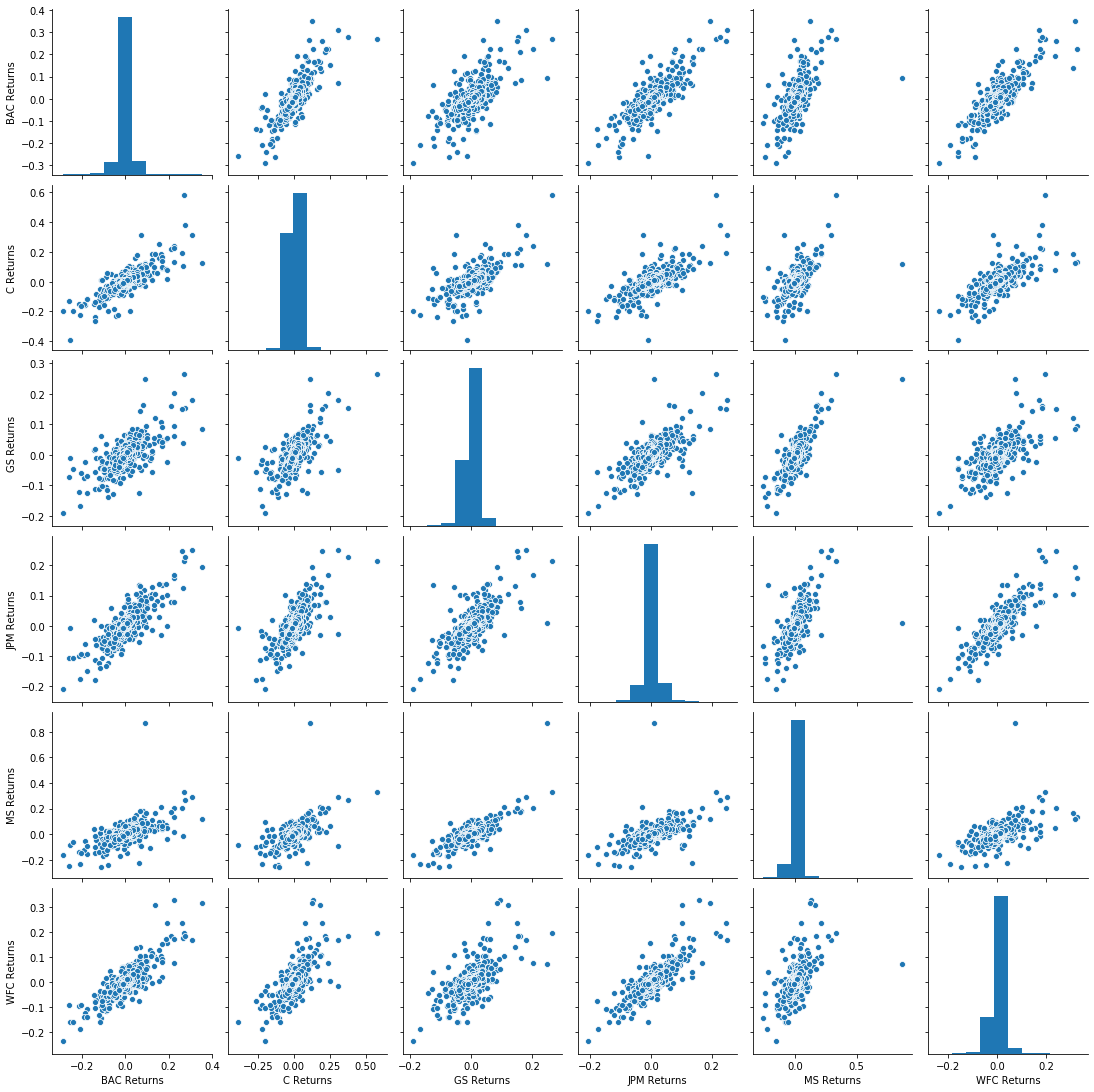

In [11]:
import seaborn as sns
sns.pairplot(returns[1:])

In [14]:
returns.idxmax()

BAC Returns   2009-04-09
C Returns     2008-11-24
GS Returns    2008-11-24
JPM Returns   2009-01-21
MS Returns    2008-10-13
WFC Returns   2008-07-16
dtype: datetime64[ns]

In [15]:
returns.idxmin()

BAC Returns   2009-01-20
C Returns     2009-02-27
GS Returns    2009-01-20
JPM Returns   2009-01-20
MS Returns    2008-10-09
WFC Returns   2009-01-20
dtype: datetime64[ns]

In [16]:
returns['2015-01-01':'2016-01-01'].std()

BAC Returns    0.016163
C Returns      0.015289
GS Returns     0.014046
JPM Returns    0.014017
MS Returns     0.016249
WFC Returns    0.012591
dtype: float64

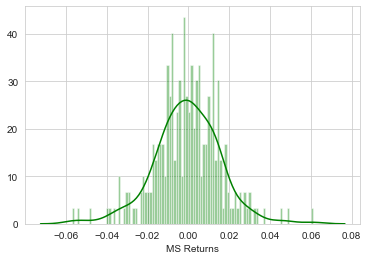

In [23]:
sns.set_style('whitegrid')
sns.distplot(returns['2015-01-01':'2016-01-01']['MS Returns'],bins=100,color='green')

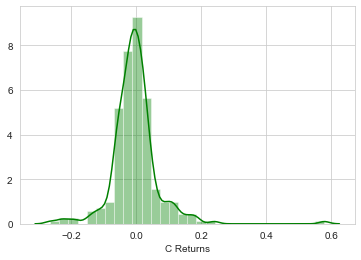

In [22]:
sns.set_style('whitegrid')
sns.distplot(returns['2008-01-01':'2009-01-01']['C Returns'],bins=30,color='green')

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

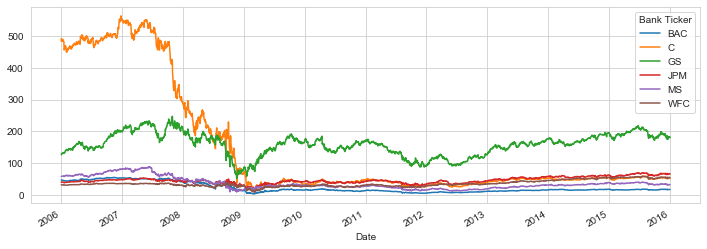

In [29]:
bank_stocks.xs(key='Close' ,level='Stock Info',axis=1).plot(figsize=(12,4))

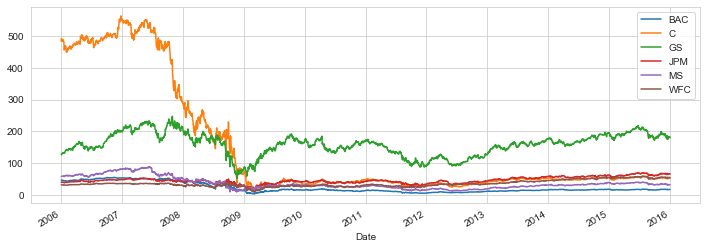

In [33]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()    

In [34]:

bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

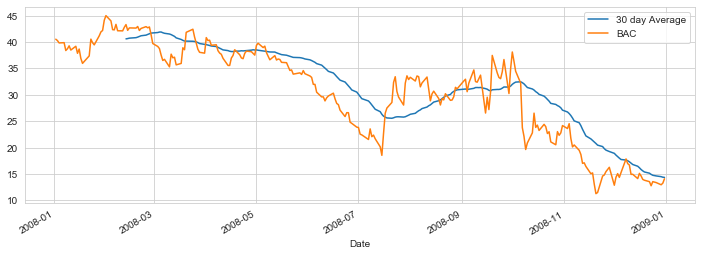

In [37]:
BAC['Close']['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day Average',figsize=(12,4))
BAC['Close']['2008-01-01':'2009-01-01'].plot(label='BAC')
plt.legend()

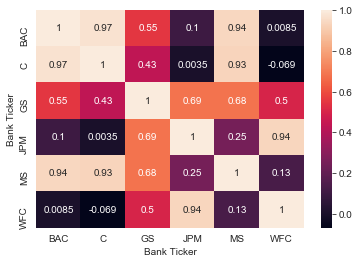

In [39]:
sns.heatmap(bank_stocks.xs(key='Close',level='Stock Info',axis=1).corr(),annot=True)

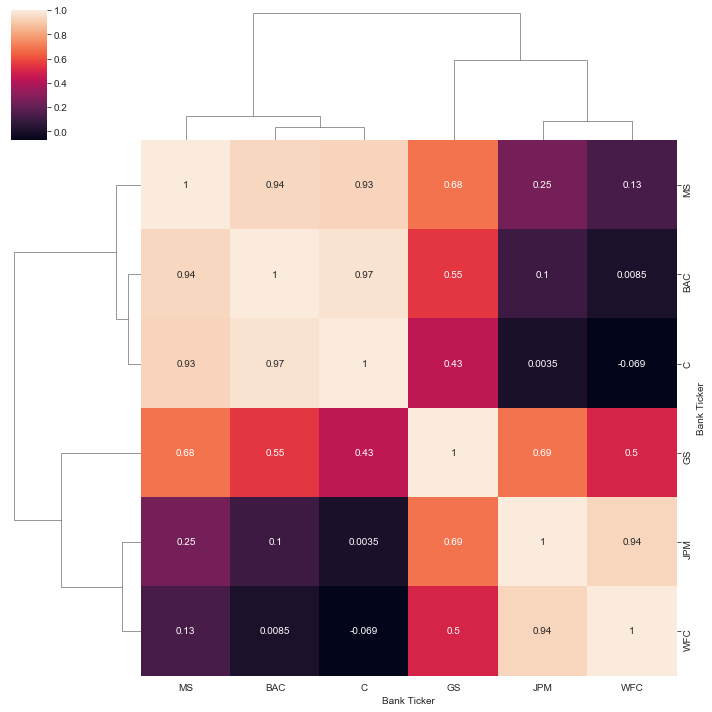

In [40]:
sns.clustermap(bank_stocks.xs(key='Close',level='Stock Info',axis=1).corr(),annot=True)

In [41]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')